## Assignment 7: Planetary Orbits

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
#u[0] u[1] u[2] u[3] u[4] u[5] u[6] u[7]
#x1   y1    x2   y2  v1x  v1y  v2x  v2y

def myfun(t, u):
    f = np.zeros((8,))
    f[0] = u[4]
    f[1] = u[5]
    f[2] = u[6]
    f[3] = u[7]
    R1 = np.sqrt((u[0]**2 + u[1]**2))
    R2 = np.sqrt(u[2]**2 + u[3]**2)
    dx = u[0] - u[2]
    dy = u[1] - u[3]
    R12 = np.sqrt(dx**2 + dy**2)
    q1 = -G*Ms/(R1**3)
    q2 = -G*Ms/(R2**3)
    q12 = -G*Mp2/(R12**3)
    q21 = -G*Mp1/(R12**3)
    f[4] = q1*u[0] + q12*dx
    f[5] = q1*u[1] + q12*dy
    f[6] = q2*u[2] - q21*dx
    f[7] = q2*u[3] - q21*dy
    return f

### Case 1

In [29]:
# set initial conditions
G = 6.67e-11 # m3 * kg-1 * s-2
Ms = 1.98e30 # mass sun in kg
Re = 150e9 #km distance between sun and earth

Mp1 = 0.001*Ms # mass planet 1
Mp2 = Mp1
Rp1 = Re
Rp2 = 0.95 * Rp1

# keplers law
k = 4*(np.pi**2)/ ( G*Ms) #constant of proportionality
Pp1 = np.sqrt(k*(Rp1**3))
Pp2 = np.sqrt(k*(Rp2**3)) #period of planet 2
Vp1 = (2*np.pi*Rp1)/Pp1 #orbital velocity planet 1
Vp2 = (2*np.pi*Rp2)/Pp2 #orbital velocity planet 2

In [30]:
#u[0] u[1] u[2] u[3] u[4] u[5] u[6] u[7]
#x1   y1    x2   y2  v1x  v1y  v2x  v2y

u0 = np.zeros((8,))
u0[0] = Rp1*np.cos(0.05)
u0[1] = Rp1*np.sin(0.05)
u0[2] = Rp2*np.cos(-0.05)
u0[3] = Rp2*np.sin(-0.05)
u0[4] = 0
u0[5] = Vp1
u0[6] = 0
u0[7] = Vp2

In [34]:
Dt = 360
t0 = 0
tmax = 20*Pp1
t = np.arange(t0, tmax,Dt)

In [36]:
from scipy.integrate import solve_ivp
sol = solve_ivp(myfun, [t0,tmax], u0, method='DOP853', t_eval=t)

Text(0.5, 1.0, 'x-y plot of the planet orbits (Case 1)')

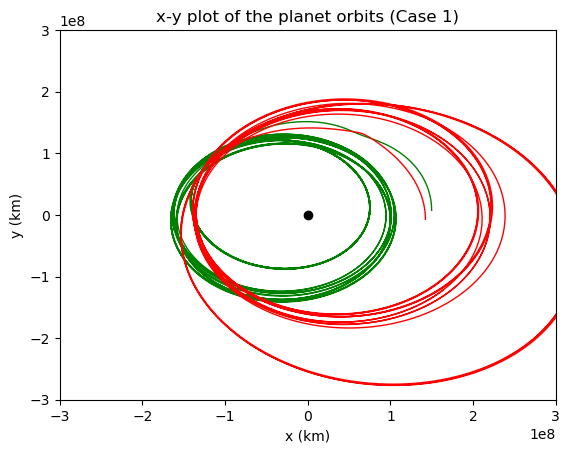

In [37]:
# x-y plot of the planet orbits

fig1 = plt.figure()
ax = plt.subplot(1,1,1)
plt.axis( [-3e8, 3e8, -3e8, 3e8] )
plt.plot(0,0, 'ko', lw=2)
plt.plot(sol.y[0]/1000, sol.y[1]/1000, 'g-', lw=1) #planet 1
plt.plot(sol.y[2]/1000, sol.y[3]/1000, 'r-', lw=1)
plt.xlabel('x (km)')
plt.ylabel('y (km)')
plt.title('x-y plot of the planet orbits (Case 1)')

Text(0.5, 0.92, '3D plot of planet orbits over time (Case 1)')

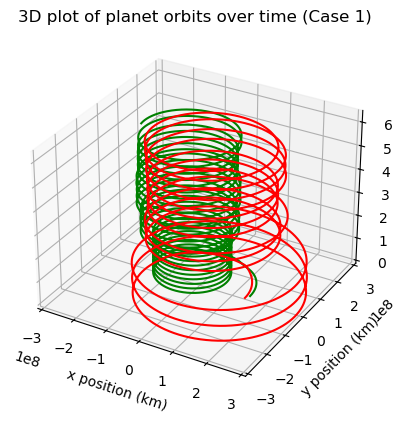

In [38]:
# 3D plot of planet orbits over time

fig1 = plt.figure()
ax1 = fig1.add_subplot(projection='3d')
ax1.set_xlim((-3e8, 3e8))
ax1.set_ylim((-3e8, 3e8))
ax1.set_zlim((t0, tmax))
ax1.plot(sol.y[0]/1000, sol.y[1]/1000, sol.t, 'g-') #planet 1 is green
ax1.plot(sol.y[2]/1000, sol.y[3]/1000, sol.t, 'r-') # planet 2 is red
ax1.set_xlabel('x position (km)')
ax1.set_ylabel('y position (km)') 
ax1.set_zlabel('time (s)')
ax1.set_title('3D plot of planet orbits over time (Case 1)')

Text(0.5, 1.0, 'distance of planets from sun over time (Case 1)')

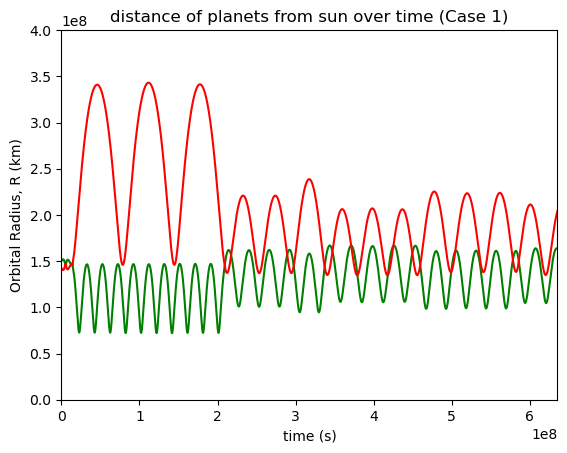

In [41]:
# distance of planets from sun over time

# we need to calculate the radius of planets
# because the last time we calculated this was in the function
Rad1 = np.sqrt(sol.y[0]**2 + sol.y[1]**2)
Rad2 = np.sqrt(sol.y[2]**2 + sol.y[3]**2)

fig1 = plt.figure()
ax = plt.subplot(1,1,1)
plt.axis( [t0,tmax, 0, 4e8])
plt.plot(t,Rad1/1000, 'g-')
plt.plot(t,Rad2/1000, 'r-')
plt.xlabel('time (s)')
plt.ylabel('Orbital Radius, R (km)')
plt.title('distance of planets from sun over time (Case 1)')

Text(0.5, 1.0, 'distance between the two planets over time (Case 1)')

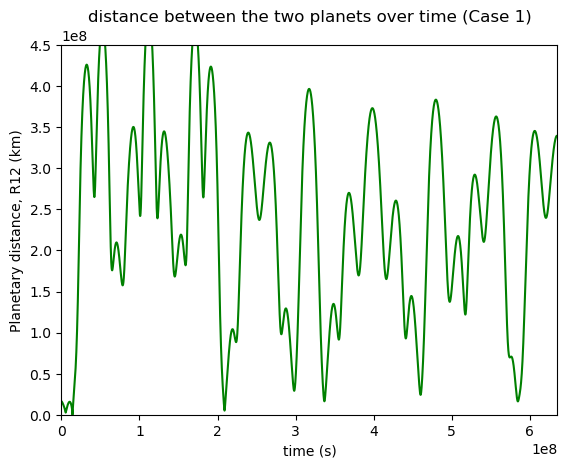

In [42]:
# distance between the two planets over time
delx = sol.y[0] - sol.y[2] #x1 - x2
dely = sol.y[1] - sol.y[3] #y1 - y2

Rad12 = np.sqrt(delx**2 + dely**2) #interplanet dif

fig1 = plt.figure()
ax = plt.subplot(1,1,1)
plt.axis( [t0,tmax, 0, 4.5e8])
plt.plot(t,Rad12/1000, 'g-')
plt.xlabel('time (s)')
plt.ylabel('Planetary distance, R12 (km)')
plt.title('distance between the two planets over time (Case 1)')

Text(0, 0.5, 'Planetary Velocity (m/s)')

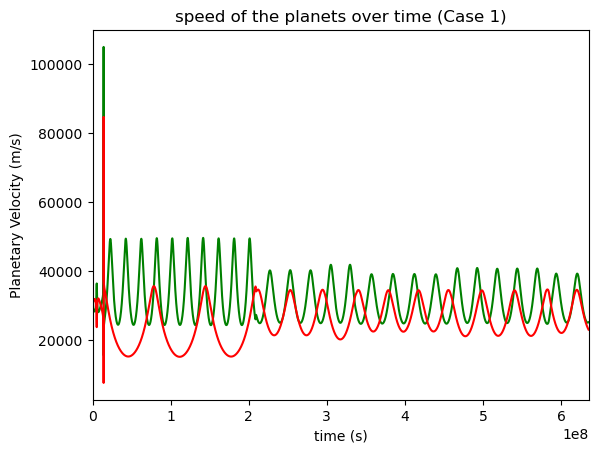

In [43]:
# speed of the planets over time

velop1 = np.sqrt(sol.y[4]**2 + sol.y[5]**2) #(vel_x^2, vel_y^2)^0.5 of planet 1
velop2 = np.sqrt(sol.y[6]**2 + sol.y[7]**2) #(vel_x^2, vel_y^2)^0.5 of planet 2

fig1 = plt.figure()
ax = plt.subplot(1,1,1)
#plt.axis( [t0,tmax, 0, 3e8])
    # we don't limit axes range because we don't know what the vel might be
ax.set_xlim([t0,tmax])
plt.plot(t,velop1, 'g-') #m/s
plt.plot(t,velop2, 'r-') #m/s
plt.title('speed of the planets over time (Case 1)')
plt.xlabel('time (s)')
plt.ylabel('Planetary Velocity (m/s)')

In [13]:
from matplotlib import animation

In [14]:
N, = np.shape(sol.t)
Nframes = 800 #bc we don't want massive amount of computation
Nskip = int(N/Nframes) #make an integer
print(N)
print(Nframes)
print(Nskip)
#we will have a frame for every integer product of Nskip,
#eg. 1*2205, 2*2205, etc.

1764611
800
2205


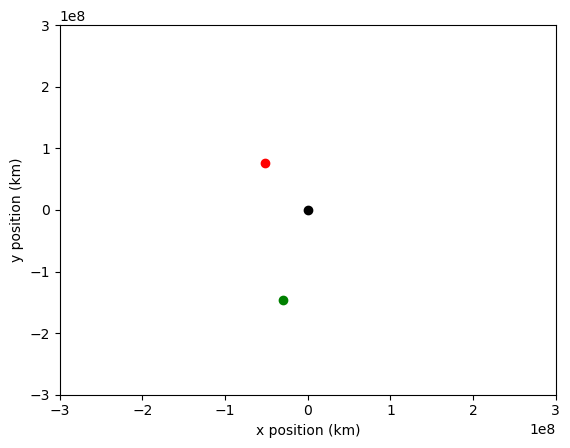

In [21]:
# animated x-y plot of the orbits
fig = plt.figure()
ax = fig.subplots()
plt.axis( [-3e8, 3e8, -3e8, 3e8] )
plt.plot(0,0, 'ko', lw=2)
plt.title('animated x-y plot of the orbits (Case 1)')
ax.set_xlabel('x position (km)')
ax.set_ylabel('y position (km)') 

line1, = ax.plot([],[], 'go', lw=2) #we will put numbers in later
line2, = ax.plot([],[], 'ro', lw=2)

def init():
    line1.set_data([],[])
    line2.set_data([],[])
    return (line1,line2)

def animate(i): #i is the index of looping
    xp1 = sol.y[0][i*Nskip]/1000 #x position of planet 1
    yp1 = sol.y[1][i*Nskip]/1000
    xp2 = sol.y[2][i*Nskip]/1000
    yp2 = sol.y[3][i*Nskip]/1000
    line1.set_data([xp1],[yp1])
    line2.set_data([xp2],[yp2])
    return (line1,line2) # this will retuirn 800 plots

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=Nframes, 
                               interval=100, blit=True)
# interval = how quickly we want the frames to flash
# blit = make the animation prettier :)

f = "planetanimation_case1.gif" #we're saving the animation, rather than playing it
writergif = animation.PillowWriter(fps=30)
anim.save(f, writer=writergif)

### Case 2

In [52]:
# setting initial conditions

G = 6.67e-11 # m3 * kg-1 * s-2
Ms = 1.98e30 # mass sun in kg
Re = 150e9 #km distance between sun and earth

Mp1 = 0.001*Ms # mass planet 1
Mp2 = 0.01*Mp1 # mass planet 2 is 1% of planet 1
Rp1 = Re
Rp2 = 1.001 * Rp1

# keplers law
k = 4*(np.pi**2)/ ( G*Ms) #constant of proportionality
Pp1 = np.sqrt(k*(Rp1**3))
Pp2 = np.sqrt(k*(Rp2**3)) #period of planet 2
Vp1 = (2*np.pi*Rp1)/Pp1 #orbital velocity planet 1
Vp2 = 2.11*Vp1 #orbital velocity planet 2

#u[0] u[1] u[2] u[3] u[4] u[5] u[6] u[7]
#x1   y1    x2   y2  v1x  v1y  v2x  v2y

u0 = np.zeros((8,))
u0[0] = Rp1
u0[1] = 0
u0[2] = Rp2
u0[3] = 0
u0[4] = 0
u0[5] = Vp1
u0[6] = 0
u0[7] = Vp2

In [53]:
Dt = 360
t0 = 0
tmax = 20*Pp1
t = np.arange(t0, tmax,Dt)

In [54]:
sol = solve_ivp(myfun, [t0,tmax], u0, method='DOP853', t_eval=t)

Text(0.5, 1.0, 'x-y plot of the planet orbits (Case 2)')

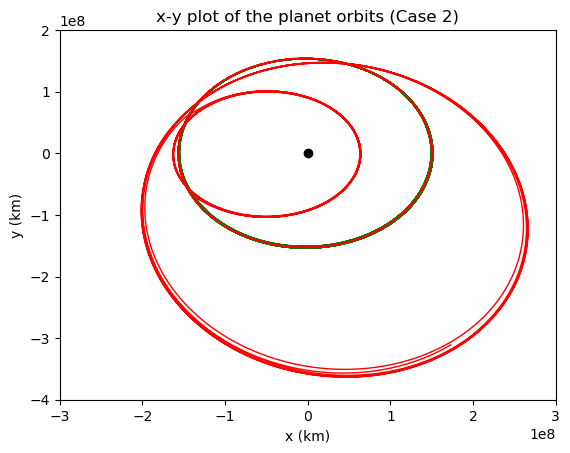

In [55]:
# x-y plot of the planet orbits
fig1 = plt.figure()
ax = plt.subplot(1,1,1)
plt.axis( [-3e8, 3e8, -4e8, 2e8] )
plt.plot(0,0, 'ko', lw=2)
plt.plot(sol.y[0]/1000, sol.y[1]/1000, 'g-', lw=1) #planet 1
plt.plot(sol.y[2]/1000, sol.y[3]/1000, 'r-', lw=1)
plt.xlabel('x (km)')
plt.ylabel('y (km)')
plt.title('x-y plot of the planet orbits (Case 2)')

Text(0.5, 0.92, '3D plot of planet orbits over time (Case 2)')

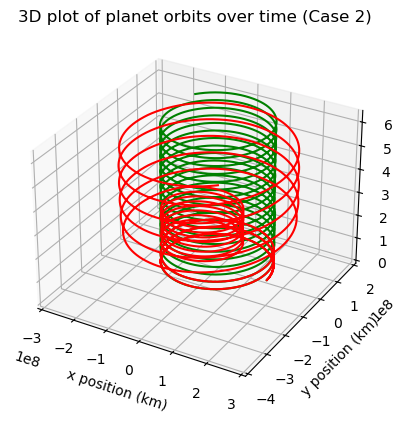

In [48]:
# 3D plot of planet orbits over time
fig1 = plt.figure()
ax1 = fig1.add_subplot(projection='3d')
ax1.set_xlim((-3e8, 3e8))
ax1.set_ylim((-4e8, 2e8))
ax1.set_zlim((t0, tmax))
ax1.plot(sol.y[0]/1000, sol.y[1]/1000, sol.t, 'g-') #planet 1 is green
ax1.plot(sol.y[2]/1000, sol.y[3]/1000, sol.t, 'r-') # planet 2 is red
ax1.set_xlabel('x position (km)')
ax1.set_ylabel('y position (km)') 
ax1.set_zlabel('time (s)')
ax1.set_title('3D plot of planet orbits over time (Case 2)')

Text(0.5, 1.0, 'distance of planets from sun over time (Case 2)')

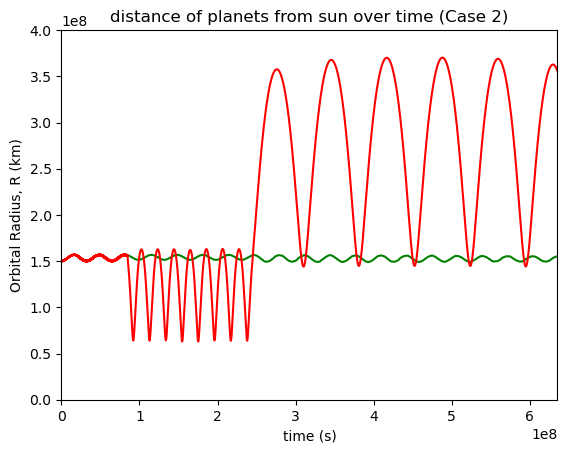

In [49]:
# distance of planets from sun over time
Rad1 = np.sqrt(sol.y[0]**2 + sol.y[1]**2)
Rad2 = np.sqrt(sol.y[2]**2 + sol.y[3]**2)

fig1 = plt.figure()
ax = plt.subplot(1,1,1)
plt.axis( [t0,tmax, 0, 4e8])
plt.plot(t,Rad1/1000, 'g-')
plt.plot(t,Rad2/1000, 'r-')
plt.xlabel('time (s)')
plt.ylabel('Orbital Radius, R (km)')
plt.title('distance of planets from sun over time (Case 2)')

Text(0.5, 1.0, 'distance between the two planets over time (Case 2)')

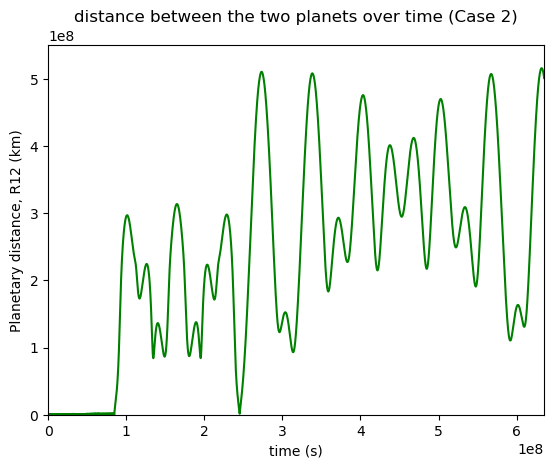

In [50]:
# distance between the two planets over time
delx = sol.y[0] - sol.y[2] #x1 - x2
dely = sol.y[1] - sol.y[3] #y1 - y2

Rad12 = np.sqrt(delx**2 + dely**2) #interplanet dif

fig1 = plt.figure()
ax = plt.subplot(1,1,1)
plt.axis( [t0,tmax, 0, 5.5e8])
plt.plot(t,Rad12/1000, 'g-')
plt.xlabel('time (s)')
plt.ylabel('Planetary distance, R12 (km)')
plt.title('distance between the two planets over time (Case 2)')

Text(0.5, 1.0, 'speed of the planets over time (Case 2)')

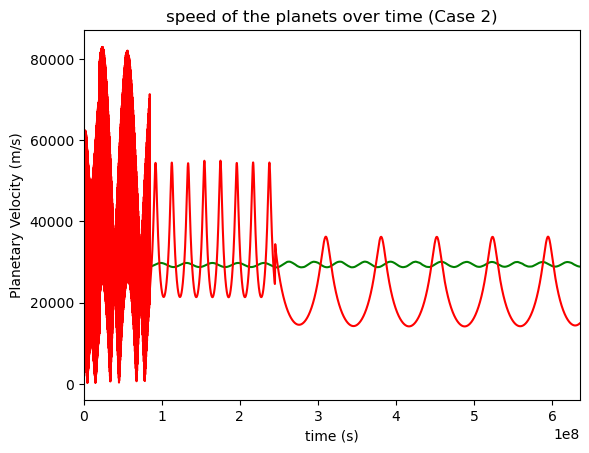

In [51]:
# speed of the planets over time
velop1 = np.sqrt(sol.y[4]**2 + sol.y[5]**2) #(vel_x^2, vel_y^2)^0.5 of planet 1
velop2 = np.sqrt(sol.y[6]**2 + sol.y[7]**2) #(vel_x^2, vel_y^2)^0.5 of planet 2

fig1 = plt.figure()
ax = plt.subplot(1,1,1)
#plt.axis( [t0,tmax, 0, 3e8])
    # we don't limit axes range because we don't know what the vel might be
ax.set_xlim([t0,tmax])
plt.plot(t,velop1, 'g-') #m/s
plt.plot(t,velop2, 'r-') #m/s

plt.xlabel('time (s)')
plt.ylabel('Planetary Velocity (m/s)')
plt.title('speed of the planets over time (Case 2)')

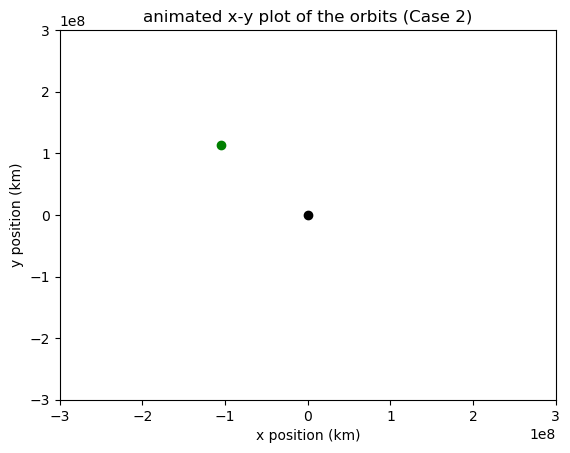

In [38]:
# animated x-y plot of the orbits
fig = plt.figure()
ax = fig.subplots()
plt.axis( [-3e8, 3e8, -3e8, 3e8] )
plt.plot(0,0, 'ko', lw=2)
plt.title('animated x-y plot of the orbits (Case 2)')
ax.set_xlabel('x position (km)')
ax.set_ylabel('y position (km)') 

line1, = ax.plot([],[], 'go', lw=2) #we will put numbers in later
line2, = ax.plot([],[], 'ro', lw=2)

def init():
    line1.set_data([],[])
    line2.set_data([],[])
    return (line1,line2)

def animate(i): #i is the index of looping
    xp1 = sol.y[0][i*Nskip]/1000 #x position of planet 1
    yp1 = sol.y[1][i*Nskip]/1000
    xp2 = sol.y[2][i*Nskip]/1000
    yp2 = sol.y[3][i*Nskip]/1000
    line1.set_data([xp1],[yp1])
    line2.set_data([xp2],[yp2])
    return (line1,line2) # this will retuirn 800 plots

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=Nframes, 
                               interval=100, blit=True)

f = "planetanimation_case2.gif" #we're saving the animation, rather than playing it
writergif = animation.PillowWriter(fps=30)
anim.save(f, writer=writergif)

### Case 3

In [42]:
# setting initial conditions

G = 6.67e-11 # m3 * kg-1 * s-2
Ms = 1.98e30 # mass sun in kg
Re = 150e9 #km distance between sun and earth

Mp1 = 0.001*Ms # mass planet 1
Mp2 = 0.5*Mp1 # mass planet 2 is 50% of planet 1
Rp1 = Re
Rp2 = Rp1

# keplers law
k = 4*(np.pi**2)/ ( G*Ms) #constant of proportionality
Pp1 = np.sqrt(k*(Rp1**3))
Pp2 = np.sqrt(k*(Rp2**3)) #period of planet 2
Vp1 = (2*np.pi*Rp1)/Pp1 #orbital velocity planet 1
Vp2 = Vp1 #orbital velocity planet 2

#u[0] u[1] u[2] u[3] u[4] u[5] u[6] u[7]
#x1   y1    x2   y2  v1x  v1y  v2x  v2y

u0 = np.zeros((8,))
u0[0] = Rp1
u0[1] = 0
u0[2] = Rp2*np.cos(np.pi/4)
u0[3] = Rp2*np.sin(np.pi/4)
u0[4] = 0
u0[5] = Vp1
u0[6] = 0
u0[7] = -Vp2

In [43]:
sol = solve_ivp(myfun, [t0,tmax], u0, method='DOP853', t_eval=t)

Text(0.5, 1.0, 'x-y plot of the planet orbits (Case 3)')

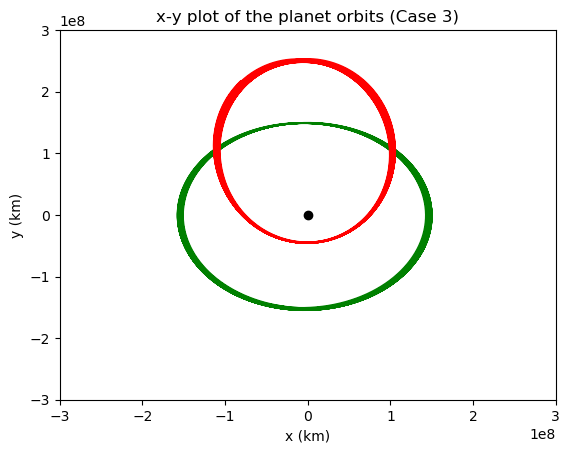

In [45]:
# x-y plot of the planet orbits
fig1 = plt.figure()
ax = plt.subplot(1,1,1)
plt.axis( [-3e8, 3e8, -3e8, 3e8] )
plt.plot(0,0, 'ko', lw=2)
plt.plot(sol.y[0]/1000, sol.y[1]/1000, 'g-', lw=1) #planet 1
plt.plot(sol.y[2]/1000, sol.y[3]/1000, 'r-', lw=1)
plt.xlabel('x (km)')
plt.ylabel('y (km)')
plt.title('x-y plot of the planet orbits (Case 3)')

Text(0.5, 0.92, '3D plot of planet orbits over time (Case 3)')

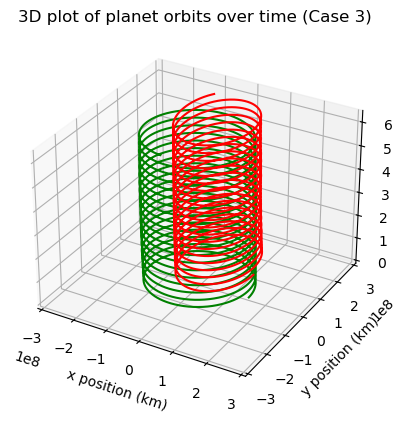

In [46]:
# 3D plot of planet orbits over time
fig1 = plt.figure()
ax1 = fig1.add_subplot(projection='3d')
ax1.set_xlim((-3e8, 3e8))
ax1.set_ylim((-3e8, 3e8))
ax1.set_zlim((t0, tmax))
ax1.plot(sol.y[0]/1000, sol.y[1]/1000, sol.t, 'g-') #planet 1 is green
ax1.plot(sol.y[2]/1000, sol.y[3]/1000, sol.t, 'r-') # planet 2 is red
ax1.set_xlabel('x position (km)')
ax1.set_ylabel('y position (km)') 
ax1.set_zlabel('time (s)')
ax1.set_title('3D plot of planet orbits over time (Case 3)')

Text(0.5, 1.0, 'distance of planets from sun over time (Case 3)')

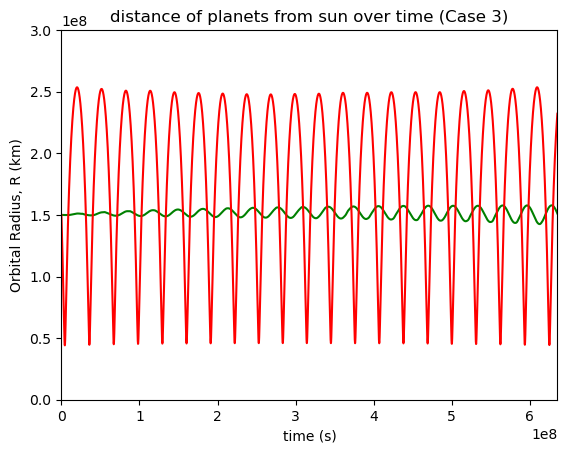

In [47]:
# distance of planets from sun over time
Rad1 = np.sqrt(sol.y[0]**2 + sol.y[1]**2)
Rad2 = np.sqrt(sol.y[2]**2 + sol.y[3]**2)

fig1 = plt.figure()
ax = plt.subplot(1,1,1)
plt.axis( [t0,tmax, 0, 3e8])
plt.plot(t,Rad1/1000, 'g-')
plt.plot(t,Rad2/1000, 'r-')
plt.xlabel('time (s)')
plt.ylabel('Orbital Radius, R (km)')
plt.title('distance of planets from sun over time (Case 3)')

Text(0.5, 1.0, 'distance between the two planets over time (Case 3)')

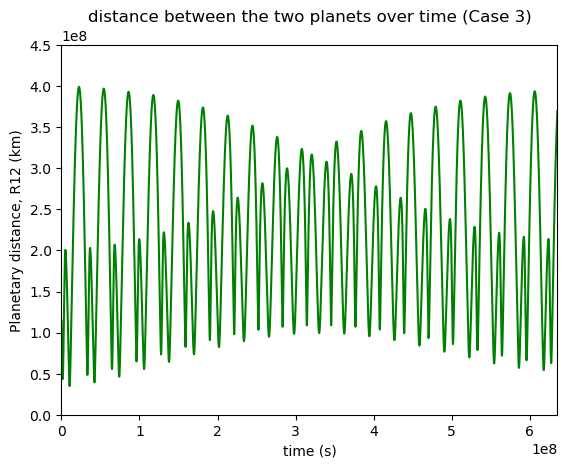

In [48]:
# distance between the two planets over time
delx = sol.y[0] - sol.y[2] #x1 - x2
dely = sol.y[1] - sol.y[3] #y1 - y2

Rad12 = np.sqrt(delx**2 + dely**2) #interplanet dif

fig1 = plt.figure()
ax = plt.subplot(1,1,1)
plt.axis( [t0,tmax, 0, 4.5e8])
plt.plot(t,Rad12/1000, 'g-')
plt.xlabel('time (s)')
plt.ylabel('Planetary distance, R12 (km)')
plt.title('distance between the two planets over time (Case 3)')

Text(0.5, 1.0, 'speed of the planets over time (Case 3)')

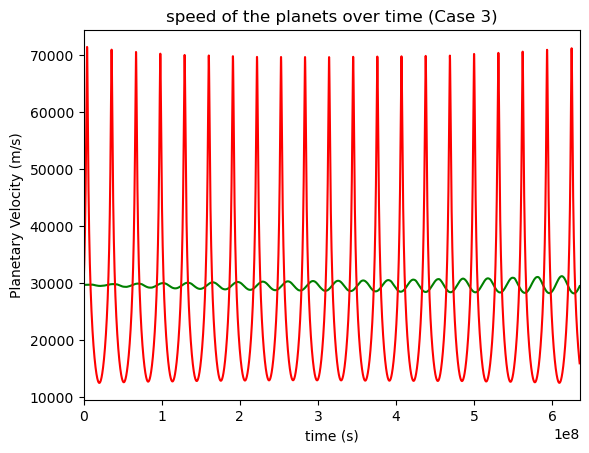

In [49]:
# speed of the planets over time
velop1 = np.sqrt(sol.y[4]**2 + sol.y[5]**2) #(vel_x^2, vel_y^2)^0.5 of planet 1
velop2 = np.sqrt(sol.y[6]**2 + sol.y[7]**2) #(vel_x^2, vel_y^2)^0.5 of planet 2

fig1 = plt.figure()
ax = plt.subplot(1,1,1)
#plt.axis( [t0,tmax, 0, 3e8])
    # we don't limit axes range because we don't know what the vel might be
ax.set_xlim([t0,tmax])
plt.plot(t,velop1, 'g-') #m/s
plt.plot(t,velop2, 'r-') #m/s

plt.xlabel('time (s)')
plt.ylabel('Planetary Velocity (m/s)')
plt.title('speed of the planets over time (Case 3)')

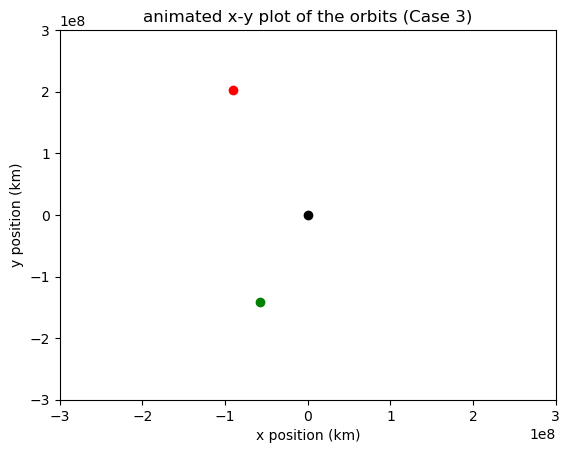

In [50]:
# animated x-y plot of the orbits
fig = plt.figure()
ax = fig.subplots()
plt.axis( [-3e8, 3e8, -3e8, 3e8] )
plt.plot(0,0, 'ko', lw=2)
plt.title('animated x-y plot of the orbits (Case 3)')
ax.set_xlabel('x position (km)')
ax.set_ylabel('y position (km)') 

line1, = ax.plot([],[], 'go', lw=2) #we will put numbers in later
line2, = ax.plot([],[], 'ro', lw=2)

def init():
    line1.set_data([],[])
    line2.set_data([],[])
    return (line1,line2)

def animate(i): #i is the index of looping
    xp1 = sol.y[0][i*Nskip]/1000 #x position of planet 1
    yp1 = sol.y[1][i*Nskip]/1000
    xp2 = sol.y[2][i*Nskip]/1000
    yp2 = sol.y[3][i*Nskip]/1000
    line1.set_data([xp1],[yp1])
    line2.set_data([xp2],[yp2])
    return (line1,line2) # this will retuirn 800 plots

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=Nframes, 
                               interval=100, blit=True)

f = "planetanimation_case3.gif" #we're saving the animation, rather than playing it
writergif = animation.PillowWriter(fps=30)
anim.save(f, writer=writergif)